# **Titanic EDA**

---
###  **Setup**

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Some customizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Showing plots inside notebook
%matplotlib inline

print("Libraries loaded successfully!")

Libraries loaded successfully!


---
### **Loading the Data**

In [2]:
# Loading dataset directly
df = sns.load_dataset('titanic')

# looking at the data
print("Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Shape: (891, 15)

First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
### **Understanding the Data**

In [3]:
# Basic info - data types and non-null counts
print("=== DATASET INFO ===")
df.info()

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Statistical summary of numerical columns
print("=== STATISTICAL SUMMARY ===")
df.describe()

=== STATISTICAL SUMMARY ===


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Checking missing values
print("=== MISSING VALUES ===")
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percent
}).sort_values('Missing Percentage', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

=== MISSING VALUES ===
             Missing Count  Missing Percentage
deck                   688           77.216611
age                    177           19.865320
embarked                 2            0.224467
embark_town              2            0.224467


---
### **Data Cleaning**

In [6]:
# Making a copy
df_clean = df.copy()

# 1. Filling the missing AGE with median
median_age = df_clean['age'].median()
df_clean['age'] = df_clean['age'].fillna(median_age)
print(f"Filled missing ages with median: {median_age}")

# 2. Filling the missing EMBARKED with most common value
most_common_port = df_clean['embarked'].mode()[0]
df_clean['embarked'] = df_clean['embarked'].fillna(most_common_port)
print(f"Filled missing embarked with: {most_common_port}")

# 3. Filling the missing EMBARKED_TOWN with most common value
most_common_town = df_clean['embark_town'].mode()[0]
df_clean['embark_town'] = df_clean['embark_town'].fillna(most_common_town)
print(f"Filled missing embark_town with: {most_common_town}")

# 4. Dropping DECK column because of too many missing values
df_clean.drop('deck', axis=1, inplace=True)
print("Dropped deck column")

# 5. Verifying there is no more missing values in important columns
print("\n=== MISSING VALUES AFTER CLEANING ===")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])
print("Data cleaning complete!")

Filled missing ages with median: 28.0
Filled missing embarked with: S
Filled missing embark_town with: Southampton
Dropped deck column

=== MISSING VALUES AFTER CLEANING ===
Series([], dtype: int64)
Data cleaning complete!


---
### **Analysis & Visualizations**

#### Overall Survival Rate

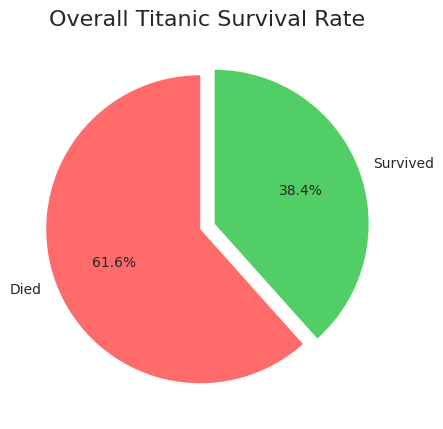

In [55]:
plt.figure(figsize=(8, 5))

survival_counts = df_clean['survived'].value_counts()
colors = ['#ff6b6b', '#51cf66']
plt.pie(survival_counts, 
        labels=['Died', 'Survived'], 
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.05, 0.05))

plt.title('Overall Titanic Survival Rate', fontsize=16)
plt.show()

#### Survival by Gender

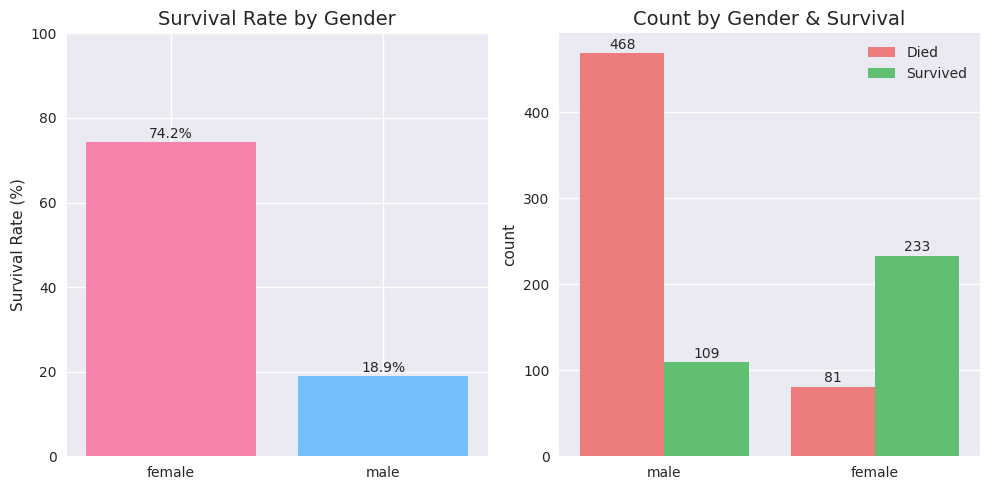

INSIGHT: 
  - Women had 74.2% survival rate vs men's 18.9%
  - Women were 3.9x more likely to survive!


In [58]:
plt.figure(figsize=(10, 5))

# Left plot
plt.subplot(1, 2, 1)
gender_survival = df_clean.groupby('sex')['survived'].mean() * 100
bars = plt.bar(gender_survival.index, 
               gender_survival.values, 
               color=['#f783ac', '#74c0fc'])
plt.title('Survival Rate by Gender', fontsize=14)
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)

# Adding value labels on left bars
for bar, val in zip(bars, gender_survival.values):
    plt.text(bar.get_x() + bar.get_width()/2., 
             bar.get_height() + 1,
             f'{val:.1f}%', 
             ha='center')

# Right plot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df_clean, 
                   x='sex',
                   hue='survived', 
                   palette={0: '#ff6b6b', 1: '#51cf66'})
plt.title('Count by Gender & Survival', fontsize=14)
plt.xlabel('')
plt.legend(['Died', 'Survived'])

# Adding value labels on right bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 5,
                f'{int(height)}',
                ha='center')

plt.tight_layout()
plt.show()

# Printing insight
female_survival = df_clean[df_clean['sex']=='female']['survived'].mean()*100
male_survival = df_clean[df_clean['sex']=='male']['survived'].mean()*100
print("INSIGHT: ")
print(f"  - Women had {female_survival:.1f}% survival rate vs men's {male_survival:.1f}%")
print(f"  - Women were {female_survival/male_survival:.1f}x more likely to survive!")

#### Survival by Passenger Class

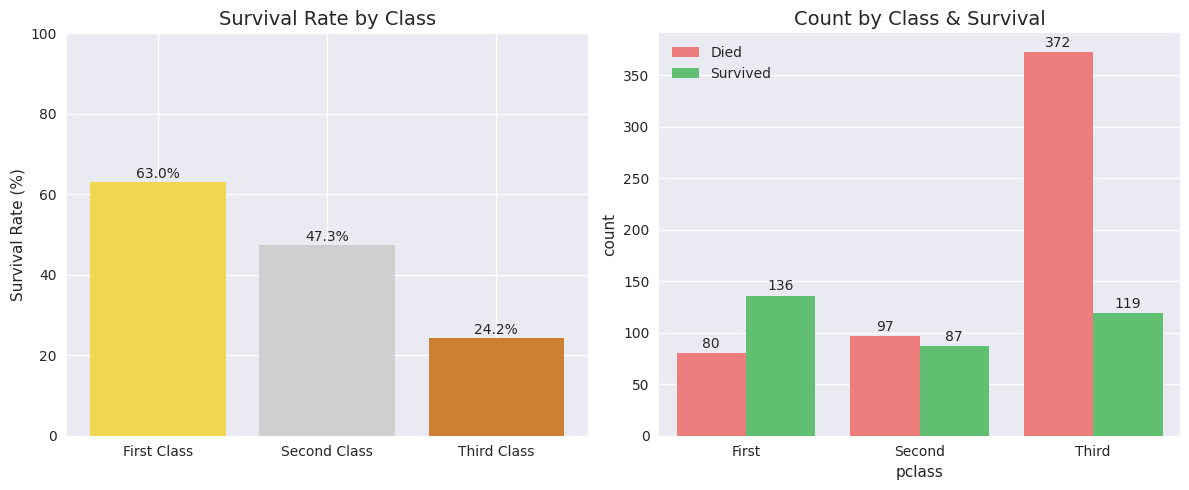

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_survival = df_clean.groupby('pclass')['survived'].mean() * 100
bars = plt.bar(['First Class', 'Second Class', 'Third Class'], 
               class_survival.values,
               color=["#efd751", "#cfcfcf", '#cd7f32'])
plt.title('Survival Rate by Class', fontsize=14)
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)

for bar, val in zip(bars, class_survival.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
             f'{val:.1f}%', ha='center')

plt.subplot(1, 2, 2)
ax = sns.countplot(data=df_clean, 
                   x='pclass', 
                   hue='survived',
              palette={0: '#ff6b6b', 1: '#51cf66'})
plt.title('Count by Class & Survival', fontsize=14)
plt.xticks([0,1,2], ['First', 'Second', 'Third'])
plt.legend(['Died', 'Survived'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 5,
                f'{int(height)}',
                ha='center')

plt.tight_layout()
plt.show()

#### Age Distribution

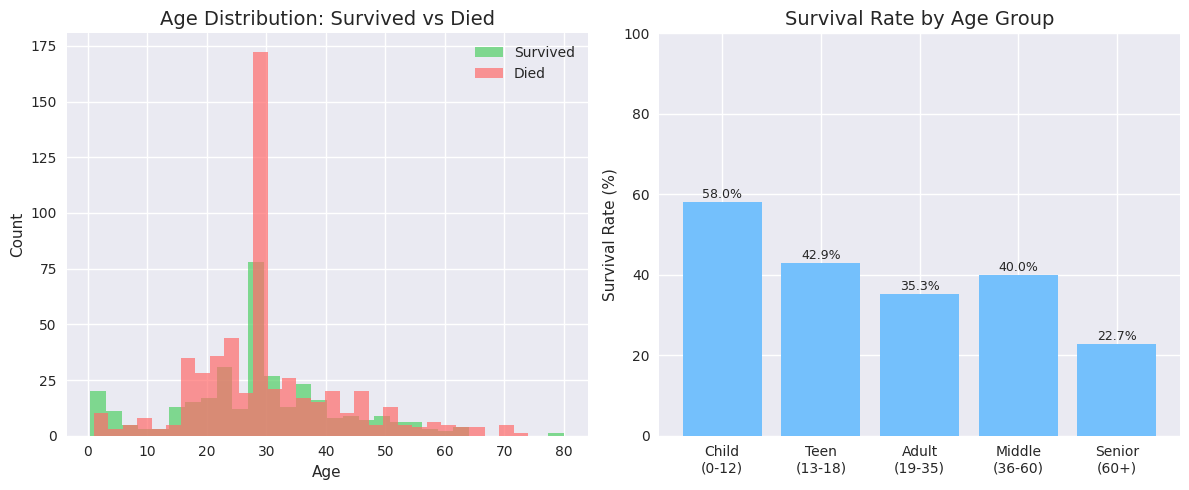

INSIGHT: 
  - Children (0-12) had the highest survival rate!
  - Average age of survivors: 28.3
  - Average age of victims: 30.0


In [62]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_clean[df_clean['survived']==1]['age'].hist(bins=30, alpha=0.7, 
                                               color='#51cf66', label='Survived')
df_clean[df_clean['survived']==0]['age'].hist(bins=30, alpha=0.7, 
                                               color='#ff6b6b', label='Died')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution: Survived vs Died', fontsize=14)
plt.legend()

plt.subplot(1, 2, 2)
# Age groups analysis
df_clean['age_group'] = pd.cut(df_clean['age'], 
                                bins=[0, 12, 18, 35, 60, 100],
                                labels=['Child\n(0-12)', 'Teen\n(13-18)', 
                                       'Adult\n(19-35)', 'Middle\n(36-60)', 
                                       'Senior\n(60+)'])

age_survival = (
    df_clean
    .groupby('age_group', observed=False)['survived']
    .mean() * 100
)
bars = plt.bar(age_survival.index, age_survival.values, color='#74c0fc')
plt.title('Survival Rate by Age Group', fontsize=14)
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)

for bar, val in zip(bars, age_survival.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
             f'{val:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("INSIGHT: ")
print(f"  - Children (0-12) had the highest survival rate!")
print(f"  - Average age of survivors: {df_clean[df_clean['survived']==1]['age'].mean():.1f}")
print(f"  - Average age of victims: {df_clean[df_clean['survived']==0]['age'].mean():.1f}")